In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\r.vardhan.reddy\Downloads\mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.columns[1]

'blue'

#### Univariate Selection

In [4]:
x=df.iloc[:,0:-1]
y=df['price_range']
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
df.shape

(2000, 21)

In [7]:
#we will give k values based on number of features we want , if we give 10 it will take top 10 features

In [8]:
#apply SelectKBest Algorithm
orederd_rank_features=SelectKBest(score_func=chi2,k=20)

In [9]:
orederd_features=orederd_rank_features.fit(x,y)

In [10]:
#scores of every feature
orederd_features.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [11]:
dfscores=pd.DataFrame(orederd_features.scores_,columns=['Score'])

In [12]:
dfcolumns=pd.DataFrame(x.columns,columns=['Features'])

In [13]:
features_rank=pd.concat([dfscores,dfcolumns],axis=1)

In [14]:
features_rank.head()

,Score,Features
0,14129.866576,battery_power
1,0.723232,blue
2,0.648366,clock_speed
3,0.631011,dual_sim
4,10.135166,fc


In [15]:
features_rank.nlargest(10,columns='Score')

,Score,Features
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


In [16]:
features_rank.sort_values(by=['Score'],ascending=False).head(10)

,Score,Features
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


In [17]:
feat=features_rank.nlargest(10,columns='Score')

In [18]:
df=df[[x for x in feat['Features']]]

In [19]:
df.head()

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8


In [20]:
[x for x in feat['Features']]

['ram',
 'px_height',
 'battery_power',
 'px_width',
 'mobile_wt',
 'int_memory',
 'sc_w',
 'talk_time',
 'fc',
 'sc_h']

#### Feature Importance
###### This Technique gives you a score for each feature of your data,the higher the score the more relevant it is

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [22]:
model=ExtraTreesClassifier()

In [23]:
model.fit(x,y)

ExtraTreesClassifier()

In [24]:
model.feature_importances_

array([0.06058866, 0.01972698, 0.03372755, 0.02027262, 0.03293865,
       0.01833603, 0.03567195, 0.03376994, 0.03702356, 0.03314896,
       0.03378178, 0.04652037, 0.04718792, 0.39097236, 0.03436377,
       0.03333514, 0.03514232, 0.01408579, 0.01856798, 0.02083767])

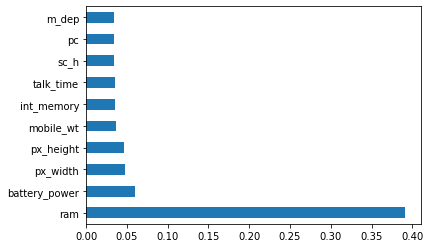

In [25]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
n_10=ranked_features.nlargest(10).plot(kind='barh')


#### Correlation

In [26]:
import seaborn as sns
df.corr()

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
ram,1.000000,-0.020352,-0.000653,0.004105,-0.002581,0.032813,0.035576,0.010820,0.015099,0.015996
px_height,-0.020352,1.000000,0.014901,0.510664,0.000939,0.010441,0.043038,-0.010645,-0.009990,0.059615
battery_power,-0.000653,0.014901,1.000000,-0.008402,0.001844,-0.004004,-0.021421,0.052510,0.033334,-0.029959
px_width,0.004105,0.510664,-0.008402,1.000000,0.000090,-0.008335,0.034699,0.006720,-0.005176,0.021599
mobile_wt,-0.002581,0.000939,0.001844,0.000090,1.000000,-0.034214,-0.020761,0.006209,0.023618,-0.033855
int_memory,0.032813,0.010441,-0.004004,-0.008335,-0.034214,1.000000,0.011731,-0.002790,-0.029133,0.037771
sc_w,0.035576,0.043038,-0.021421,0.034699,-0.020761,0.011731,1.000000,-0.022821,-0.012373,0.506144
talk_time,0.010820,-0.010645,0.052510,0.006720,0.006209,-0.002790,-0.022821,1.000000,-0.006829,-0.017335
fc,0.015099,-0.009990,0.033334,-0.005176,0.023618,-0.029133,-0.012373,-0.006829,1.000000,-0.011014
sc_h,0.015996,0.059615,-0.029959,0.021599,-0.033855,0.037771,0.506144,-0.017335,-0.011014,1.000000


In [27]:
corr=df.iloc[:,:-1].corr()
top_features=corr.index
top_features

Index(['ram', 'px_height', 'battery_power', 'px_width', 'mobile_wt',
       'int_memory', 'sc_w', 'talk_time', 'fc'],
      dtype='object')

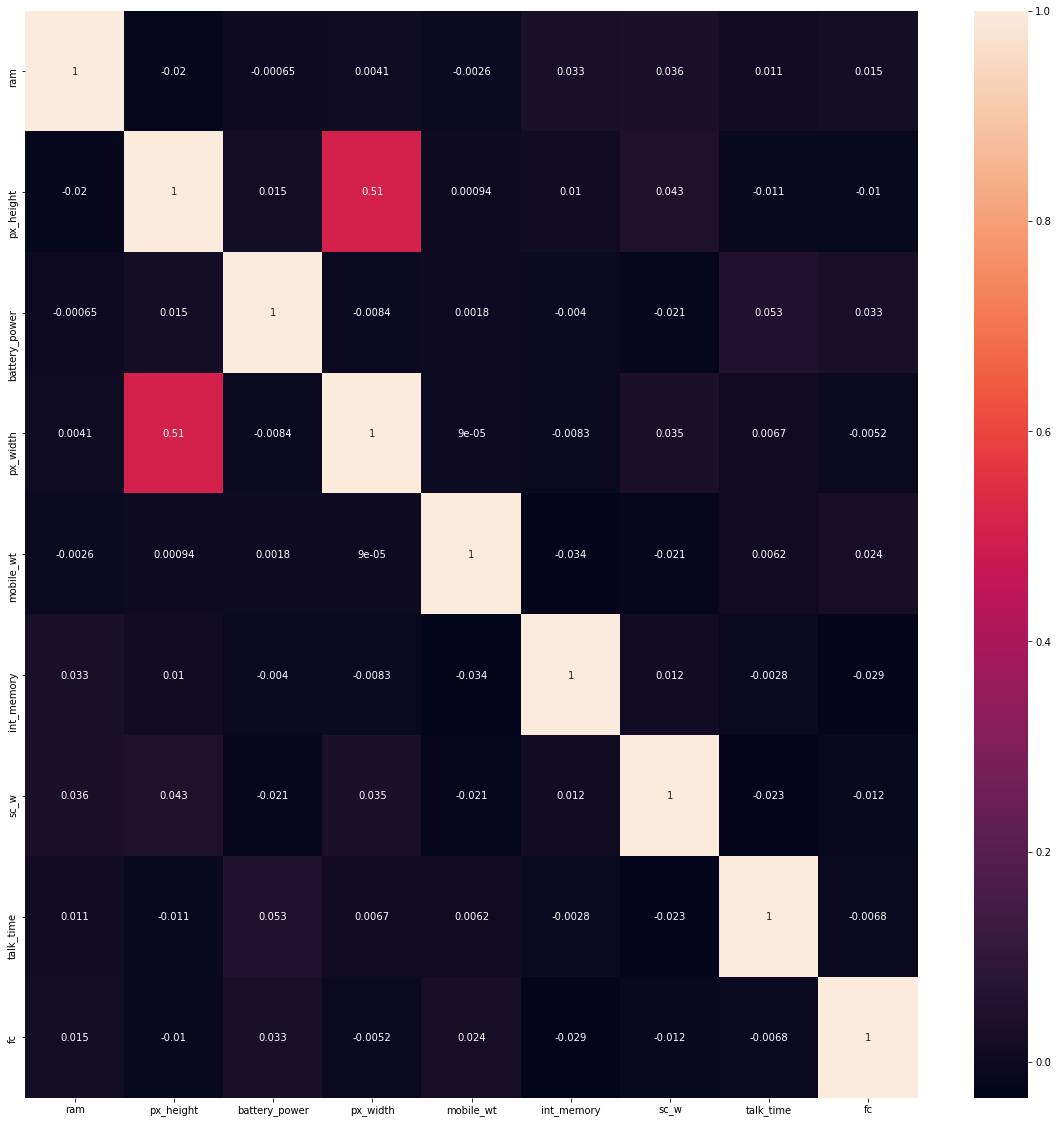

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

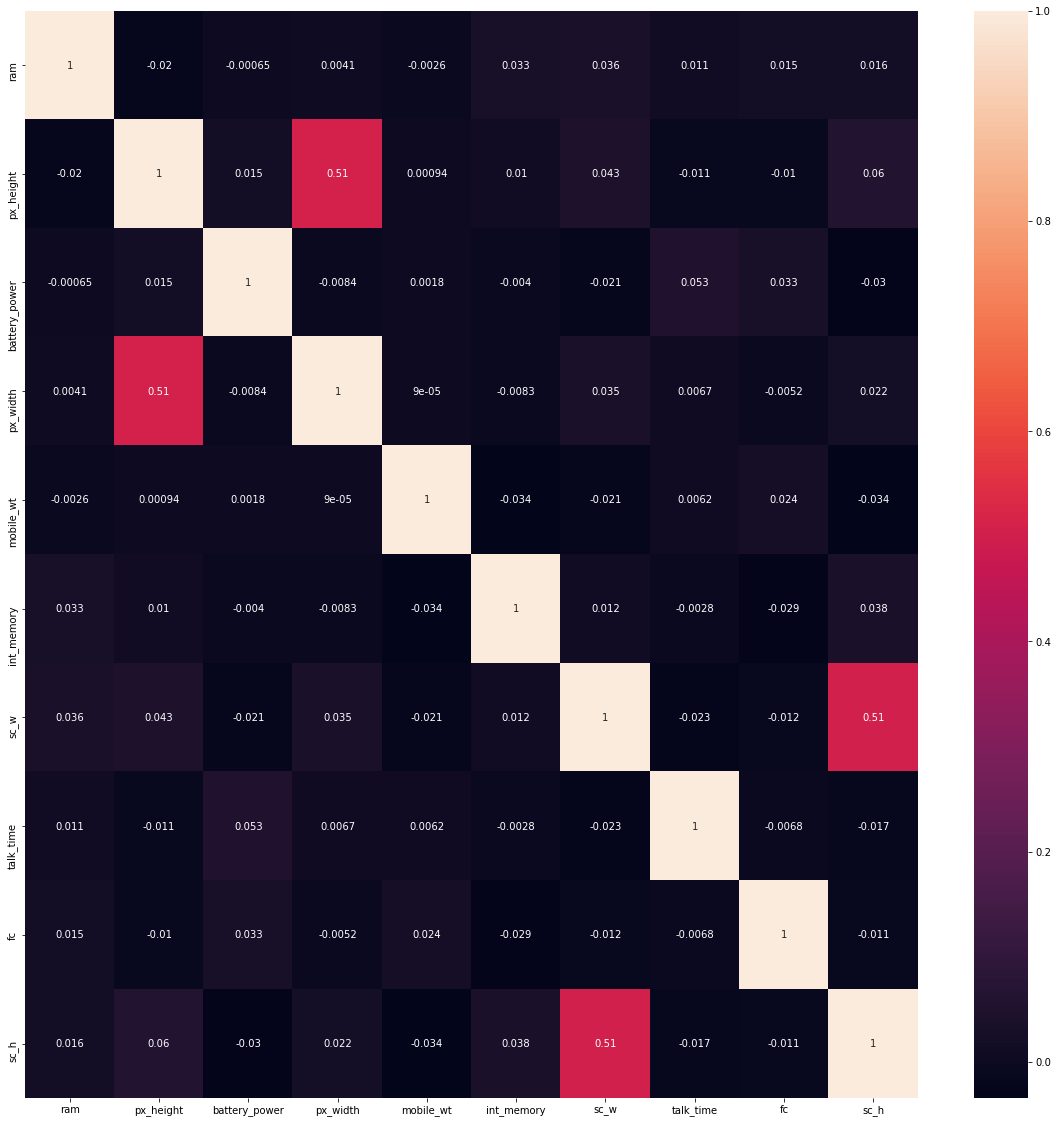

In [29]:
column=df.columns
plt.figure(figsize=(20,20))
sns.heatmap(df[column].corr(),annot=True)

In [30]:
treshold=0.5


In [31]:
def correlation(dataset, threshold): 
    col_corr = set() # Set of all the names of correlated columns 
    corr_matrix = dataset.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i): 
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [32]:
correlation(df.iloc[:,:-1],treshold)

{'px_width'}

# Information Gain

In [33]:
from sklearn.feature_selection import mutual_info_classif

In [34]:
mutual_info=mutual_info_classif(x,y)

In [35]:
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)

ram              0.846532
battery_power    0.031740
px_width         0.029465
n_cores          0.023528
px_height        0.023415
pc               0.021227
four_g           0.020348
int_memory       0.006314
wifi             0.006279
m_dep            0.005799
talk_time        0.004016
blue             0.000138
sc_w             0.000000
sc_h             0.000000
three_g          0.000000
touch_screen     0.000000
mobile_wt        0.000000
fc               0.000000
dual_sim         0.000000
clock_speed      0.000000
dtype: float64

#### Dropping constant features

in this step we are removing the features which have constant values , not that imp to solve problem stat.

In [36]:
data=pd.DataFrame({'A':[1,2,4,1,2,4],'B':[4,5,6,7,8,9],'C':[0,0,0,0,0,0],'D':[1,1,1,1,1,1]})
data

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1
5,4,9,0,1


In [37]:
#Variance Treshold : we use Variance Treshold method to remove all low variance features

In [38]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [39]:
var_thres.get_support()

array([ True,  True, False, False])

In [40]:
data.columns[ [True,  True, False, False]]

Index(['A', 'B'], dtype='object')

In [41]:
for column in data.columns:
    print(column)

A
B
C
D


In [42]:
 data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [43]:
constant_columns=[column for column in data.columns
                  if column not in data.columns[var_thres.get_support()]]
print(len(constant_columns))

2


In [44]:
data.drop(constant_columns,axis=1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


In [45]:
df=pd.read_csv(r'C:\Users\r.vardhan.reddy\Downloads\santander.csv',nrows=10000)
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [46]:
x=df.drop('TARGET',axis=1)
y=df['TARGET']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [52]:
y_test

9394    0
898     0
2398    0
5906    0
2343    0
       ..
4004    0
7375    0
9307    0
8394    0
5233    0
Name: TARGET, Length: 3000, dtype: int64

##### Lets apply variance treshold

In [49]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train)

VarianceThreshold(threshold=0)

In [61]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [62]:
sum(var_thres.get_support())

284

In [65]:
constant_columns=[column for column in x_train.columns
                  if column not in x_train.columns[var_thres.get_support()]]
len(constant_columns)

86

In [66]:
constant_columns

['ind_var2_0',
 'ind_var2',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var13_medio',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_out_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_var7_emit_ult1',
 

In [67]:
x_train.drop(constant_columns,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86412.15
